In [11]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
def moving_average(x, window_size=100):
    return np.convolve(x, np.ones(window_size)/window_size, mode='same')

def clip_values(x, min_val, max_val):
    return np.clip(x, min_val, max_val)

In [13]:
input_folder = '/home/mila/e/elizabeth.janes/courses/comp_579/vccrl-llm/exp_trainer_states'
exp_files = ['default', 'max_grad_norm_100', 'beta_0p1', 'beta_0p01', 'temp_0p6', 'temp_0p25', 'best_combo_final']
exp_names = ['Default', 'max_grad_norm = 100.0', rf'$\beta=0.1$', rf'$\beta=0.01$', 'T=0.6', 'T=0.25', 'Best HP Combo']

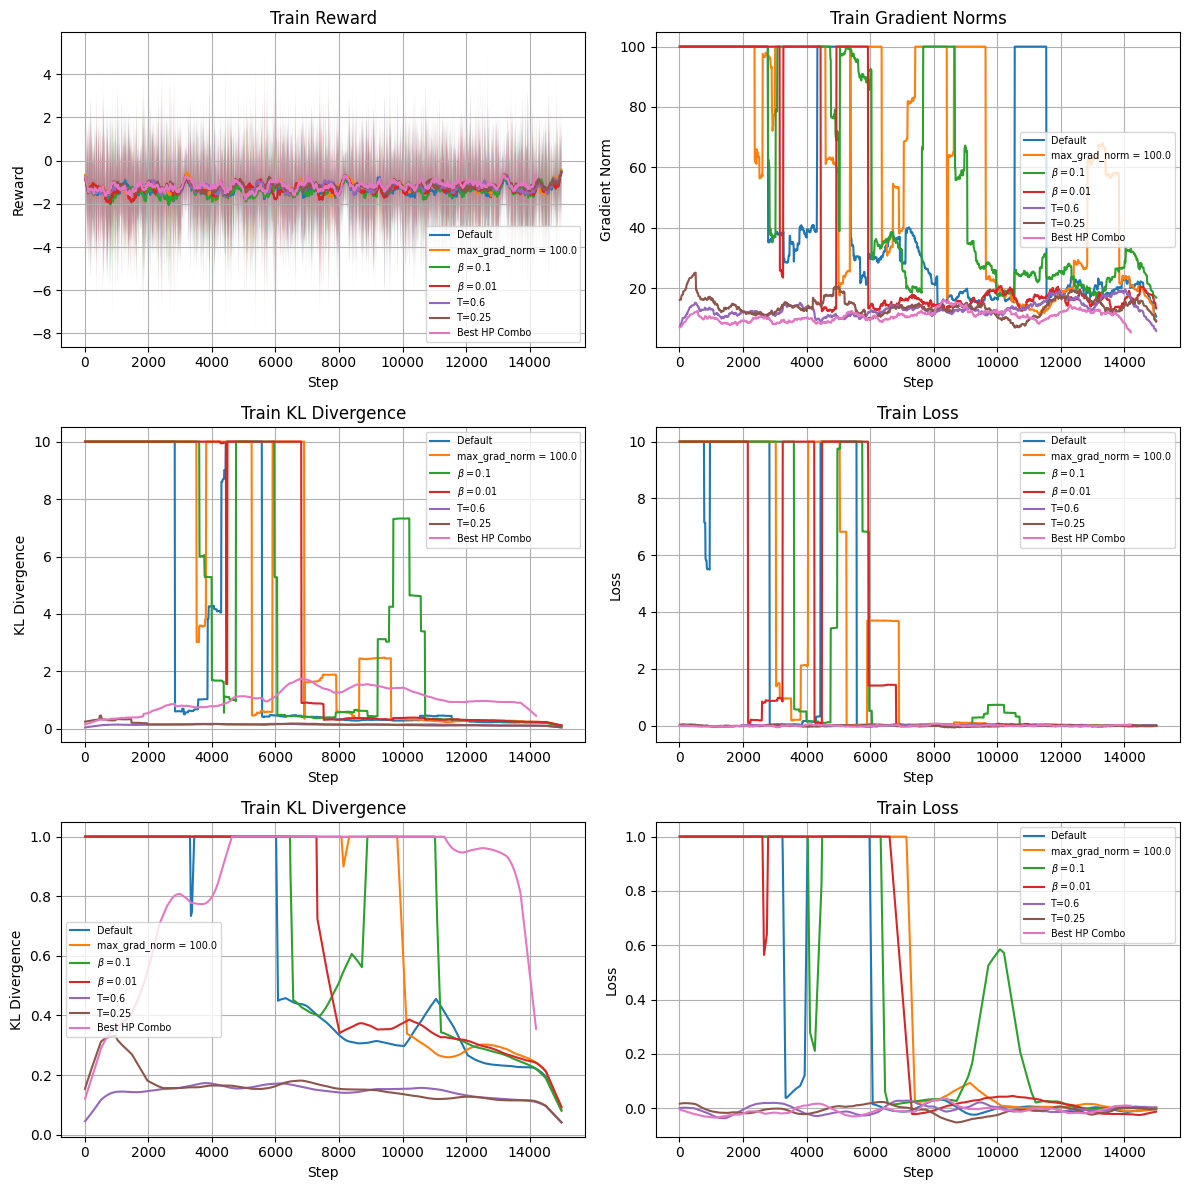

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
for exp, name in zip(exp_files, exp_names):
    input_path = os.path.join(input_folder, exp+'.json')

    with open(input_path, 'r') as f:
        data = json.load(f)

    log_history = data["log_history"]

    steps = [entry["step"] for entry in log_history]
    losses = [entry["loss"] for entry in log_history]
    rewards = [entry["reward"] for entry in log_history]
    reward_stds = [entry["reward_std"] for entry in log_history]
    kls = [entry["kl"] for entry in log_history]
    grad_norm = [entry["grad_norm"] for entry in log_history]
    clip_ratio = [entry["clip_ratio"] for entry in log_history]

    # Smooth and no clipping
    rewards = moving_average(rewards, 20)
    losses = clip_values(moving_average(losses), -10, 10)
    kls = clip_values(moving_average(kls), -10, 10)
    grad_norm = clip_values(moving_average(grad_norm), -100, 100)

    # Reward
    axs[0, 0].plot(steps, rewards, label=name)#, color='green')
    axs[0, 0].fill_between(steps, 
                        np.array(rewards)-np.array(reward_stds), 
                        np.array(rewards)+np.array(reward_stds), 
                        alpha=0.2)
    axs[0, 0].set_title('Train Reward')
    axs[0, 0].set_ylabel('Reward')

    # KL
    axs[1, 0].plot(steps, kls, label=name)#, color='orange')
    axs[1, 0].set_title('Train KL Divergence')
    axs[1, 0].set_ylabel('KL Divergence')

    # Loss
    axs[1, 1].plot(steps, losses, label=name)#, color='red')
    axs[1, 1].set_title('Train Loss')
    axs[1, 1].set_ylabel('Loss')

    # Grad Norm
    axs[0, 1].plot(steps, grad_norm, label=name)#, color='purple')
    axs[0, 1].set_title('Train Gradient Norms')
    axs[0, 1].set_ylabel('Gradient Norm')

    
    losses = clip_values(moving_average(losses), -1, 1)
    kls = clip_values(moving_average(kls), -1, 1)

        # KL
    axs[2, 0].plot(steps, kls, label=name)#, color='orange')
    axs[2, 0].set_title('Train KL Divergence')
    axs[2, 0].set_ylabel('KL Divergence')

    # Loss
    axs[2, 1].plot(steps, losses, label=name)#, color='red')
    axs[2, 1].set_title('Train Loss')
    axs[2, 1].set_ylabel('Loss')

for ax in axs.flat:
    ax.set_xlabel('Step')
    ax.grid(True)
    ax.legend(fontsize='x-small')

plt.tight_layout()
# plt.savefig(output_path)
# print(f'Plot saved to {output_path}')